In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']

In [5]:
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


<Axes: xlabel='total_spend', ylabel='sales'>

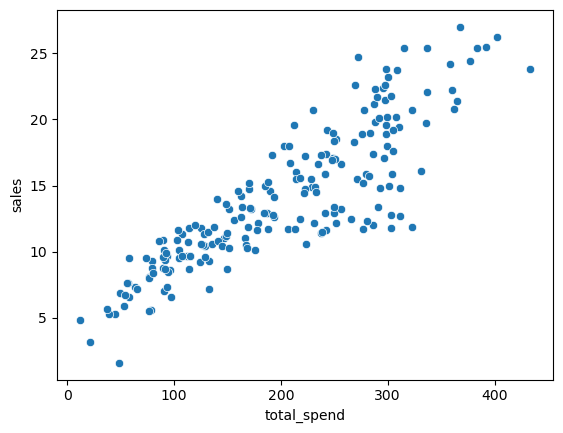

In [7]:
sns.scatterplot(data=df, x='total_spend', y='sales')

<Axes: xlabel='total_spend', ylabel='sales'>

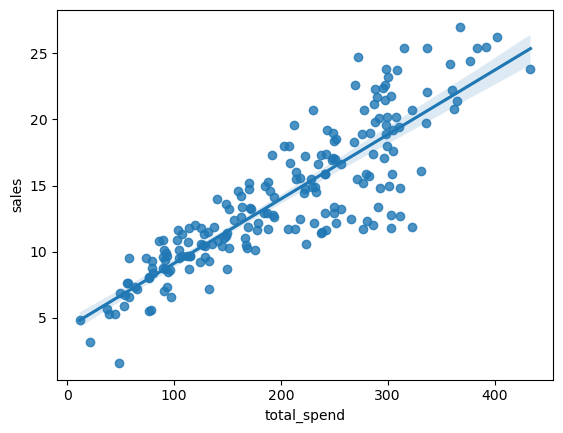

In [9]:
sns.regplot(data=df, x='total_spend', y='sales')

In [10]:
X = df['total_spend']
y = df['sales']

In [12]:
import numpy as np
np.polyfit(X,y,deg=1)

array([0.04868788, 4.24302822])

In [13]:
potential_spend = np.linspace(0,500,100)

In [14]:
pridicted_sales = 0.04868788*potential_spend + 4.24302822

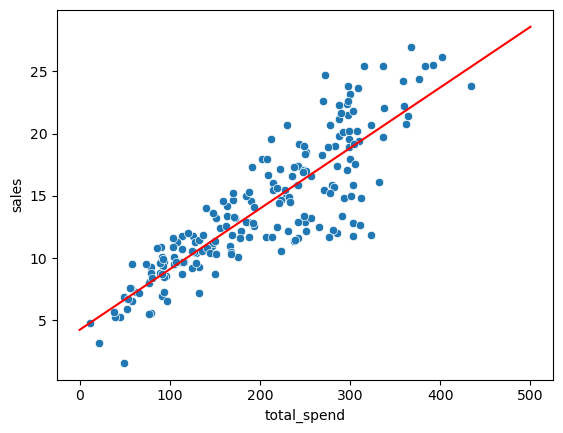

In [17]:
sns.scatterplot(data=df, x='total_spend', y='sales')
plt.plot(potential_spend, pridicted_sales,color='red')

In [19]:
spend = 200
pridicted_sale = 0.04868788*spend + 4.24302822
pridicted_sale

13.98060422

In [20]:
np.polyfit(X,y,3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [31]:
pot_spend = np.linspace(0,500,100)

In [34]:
pred_sales = 3.07615033e-07*pot_spend**3 + -1.89392449e-04*pot_spend**2 + 8.20886302e-02*pot_spend + 2.70495053e+00

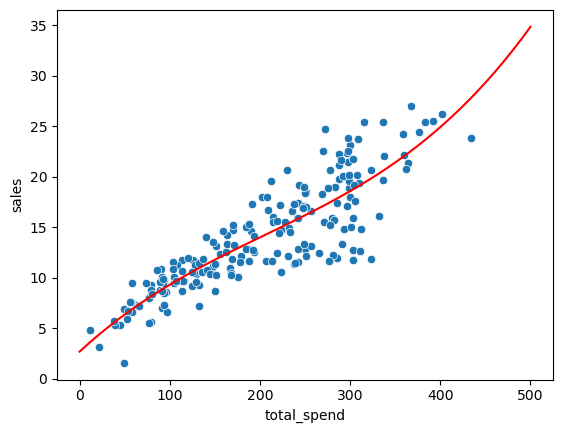

In [36]:
sns.scatterplot(data=df, x='total_spend', y='sales')
plt.plot(pot_spend, pred_sales,color='red')

In [37]:
X = df.drop('sales', axis=1)
X

,TV,radio,newspaper,total_spend
0,230.1,37.8,69.2,337.1
1,44.5,39.3,45.1,128.9
2,17.2,45.9,69.3,132.4
3,151.5,41.3,58.5,251.3
4,180.8,10.8,58.4,250.0
...,...,...,...,...
195,38.2,3.7,13.8,55.7
196,94.2,4.9,8.1,107.2
197,177.0,9.3,6.4,192.7
198,283.6,42.0,66.2,391.8


In [38]:
y = df['sales']

In [39]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [41]:
from sklearn.linear_model import LinearRegression

In [43]:
# help(LinearRegression)

In [44]:
model = LinearRegression()

In [50]:
model.fit(X_train,y_train)

LinearRegression()

In [51]:
test_prediction = model.predict(X_test)

In [52]:
test_prediction

array([15.64343813, 19.58078283, 11.42717781, 16.90494334,  9.17645232,
        7.01921001, 20.24548588, 17.27288092,  9.81362002, 19.15221858,
       12.36281849, 13.90086335, 13.74679921, 21.16322282, 18.31876004,
        9.96472602, 15.56312703,  7.73452007,  7.57314037, 20.32745421,
        7.79414911, 18.16308067, 24.57041484, 22.71055089,  8.01558318,
       12.65730219, 21.43661308,  8.04499619, 12.43159447, 12.40259255,
       10.70029092, 19.16776811, 10.10150532,  6.69083331, 17.24889776,
        7.79224406,  9.25952001,  8.31516806, 10.51963092, 10.67086792,
       12.88094679,  9.79344981, 10.20060813,  8.013982  , 11.54267429,
       10.07800983,  8.98583386, 16.21285502, 13.20750313, 20.70094692,
       12.42670309, 13.96572233, 17.55475937, 11.15936616, 12.58108647,
        5.54230087, 23.22486082, 12.58536565, 18.76366836, 15.15376302,
       15.15931391, 23.91773675,  6.78191588, 19.84529505, 13.86858162,
       21.07676645])

In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [53]:
df['sales'].mean()

14.0225

<Axes: xlabel='sales', ylabel='Count'>

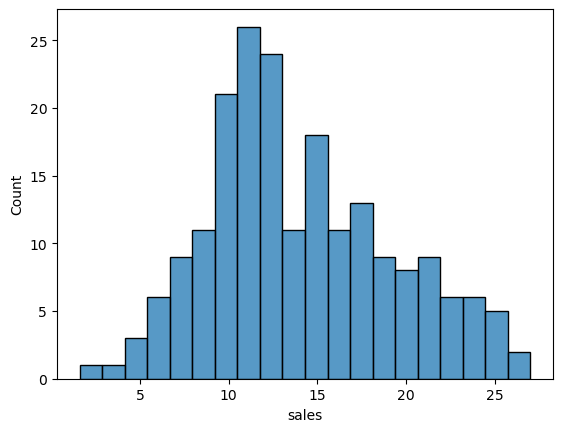

In [55]:
sns.histplot(data=df,x='sales',bins=20)

In [58]:
mean_absolute_error(y_test, test_prediction)

1.2369188494259313

In [59]:
mean_squared_error(y_test, test_prediction)

2.348375242713829

In [61]:
# this is the calculation for root mean squered error
np.sqrt(mean_squared_error(y_test, test_prediction))

1.5324409426512426

In [62]:
# To calculate the residuals we say residual = data_to_be_predicted - the_predicted_data.
test_residuals = y_test - test_prediction

In [64]:
# test_residuals

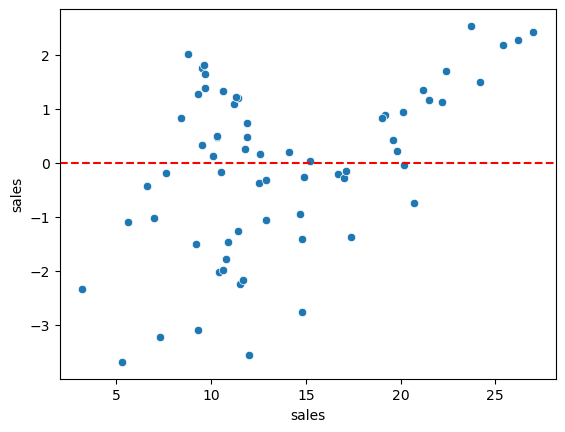

In [66]:
# Creating our residual plot
sns.scatterplot(x=y_test,y=test_residuals)
plt.axhline(y=0,color='r',ls='--')

C:\Users\Muhammad Nasir\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


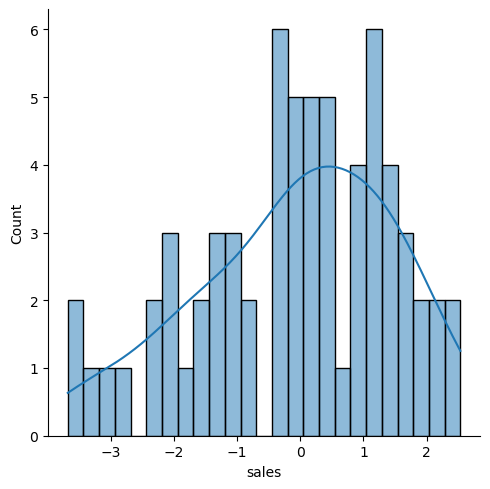

In [70]:
sns.displot(test_residuals,bins=25,kde=True)

In [71]:
import scipy as sp

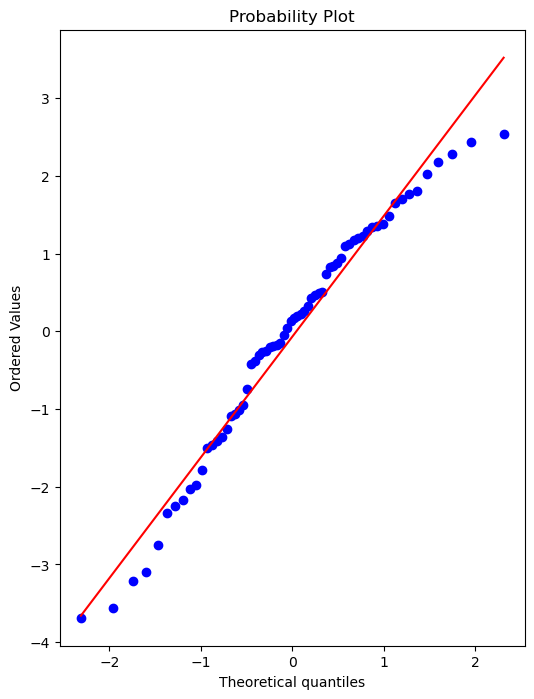

In [72]:
fig, ax = plt.subplots(figsize=(6,8), dpi=100)
_ = sp.stats.probplot(test_residuals,plot=ax)

In [74]:
final_model = LinearRegression()

In [75]:
final_model.fit(X,y)

LinearRegression()

In [76]:
final_model.coef_

array([-0.01254965,  0.13021572, -0.05935179,  0.05831429])

In [77]:
from joblib import dump,load

In [78]:
dump(final_model, 'final_sales_model.joblib')

['final_sales_model.joblib']

In [79]:
# loading a saved model
loaded_model = load('final_sales_model.joblib')

In [80]:
loaded_model.coef_

array([-0.01254965,  0.13021572, -0.05935179,  0.05831429])

In [81]:
# lets make a prediction on a new model.
tester = [[100,20,10,130]]

In [82]:
loaded_model.predict(tester)

C:\Users\Muhammad Nasir\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11.27557932])